# Lecture 21 - Root Finding

We've now seen finite-difference approximations for derivatives, Riemann sums for integration, and elimination for solving $\mathbf{Ax}=\mathbf{b}$.  Now, we turn to solving $f(x) = 0$ and $\mathbf{f(x)} = \mathbf{0}$, i.e., nonlinear systems.


### Objectives

By the end of this lesson, you should be able to

- Use graphical means to isolate roots of  nonlinear equations.
- Find an isolated root of nonlinear equations using the bisection method.
- Find an isolated root of nonlinear equations (or systems of equations) using Newton's method.
- Find an isolated root of nonlinear equations (or systems of equations) using `fsolve`.

## Nonlinear Equations

Linear equations are characterized by *linear combinations* of the unknowns, e.g.,

$$
\begin{split}
 ax + by &= 1 \\
 cx + dy &= 2 
\end{split}
$$

Any deviation from this pattern results in **nonlinear equations**, which we can solve
  - analytically (or symbolically)
  - graphically
  - numerically

### Analytic Solutions

In *rare* cases, nonlinear equations have closed-form solutions.

**Exercise**: Find all values of $x$ such that $\sin(ax) - b = 0$.  


### Graphical Solutions

Can't solve it?  **Plot it!**

For single equation $f(x) = g(x)$:
  - plot $f(x)$ and $g(x)$ over the range of interest to identify intersections
  - plot $f(x)-g(x)$ to identify roots

**Exercise**: The solution of transient heat-conduction problems often involves a technique called *separation of variables*.  Application of this technique to an infinite slab of thickness $2L$ subject to certain initial and boundary conditions leads to the transcendental equation

$$
  \cot \lambda L = \frac{\lambda L}{hL/k} = \frac{\lambda L}{\text{Bi}} \, ,
$$

where $\lambda$ is a dimensionless, undetermined parameter, $h$ is the heat transfer coefficient, $k$ is the thermal conductivity, and $\text{Bi}$ is the *Biot number*.  The Biot number quantifies how hard it is for heat to flow *within* a body relative to how hard it is to flow *through the outer surface* of the body.  Only for certain values of $\lambda$ can the equation be solved. Determine these values graphically by plotting the left-hand and right-hand sides of the equation as functions of $\lambda L$.  Assume $L = 5$ and $\text{Bi}=0.5$.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
L, Bi = 5, 0.5

## Determining Roots Numerically

The numerical solution of $f(x) = 0$ can be challenging since it requires we know at least a little about the desired solution, particularly the range in which the root is contained. We'll explore three basic schemes for solving $f(x)$: the [bisection method](http://mathworld.wolfram.com/Bisection.html), [Newton's method](http://mathworld.wolfram.com/NewtonsMethod.html), and the secant method.

### Bisection

Just like **binary search**!  Now, compare *sign* rather than *magnitude* (and keep **repeating**).

```
'''Bisection method for finding an isolated root of f between a and b'''
Input: f, a, b, tau

# Define the left and right boundaries
Set L = a
Set R = b

# Define the central point
Set C = (a+b)/2

# Go until f(C) is close enough to zero (i.e., that
# C is close enough to the root between a and b
While |f(C)| > tau 
    If sign(f(C)) == sign(f(L)) then
        # the root must be between C and R
        L = C
    Otherwise
        # the root must be between L and C
        R = C
    C = (L+R)/2
Output: C
```

**Exercise**: How can you defined `sign(f(C))` in Python?

Graphical display of bisection to find first positive root of $\sin(x) - 2/5$:

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def bisection_root():
    
    f = lambda z: np.sin(z)-0.4    
    x = np.linspace(0, 1, 100)    
    plt.plot(x, f(x), 'k', x, 0*x,'k--')
    
    # Plot f(A), f(B)
    A, B, C = 0, 1.0, 0.5
    plt.plot(A, f(A), 'bs', ms=22)
    plt.plot(B, f(B), 'bs', ms=22)
    plt.plot(C, f(C), 'bs', ms=22, label='initial')
    plt.fill_betweenx([f(A), f(B)], A, B, color='b', alpha=0.05)
    
    A, B, C = A, C, (A+C)/2
    plt.plot(A, f(A), 'ro', ms=15)
    plt.plot(B, f(B), 'ro', ms=15)
    plt.plot(C, f(C), 'ro', ms=15, label='after first iteration')
    plt.fill_betweenx([f(A), f(B)], A, B, color='r', alpha=0.1)
    
    A, B, C = C, B, (C+B)/2
    plt.plot(A, f(A), 'c>', ms=12)
    plt.plot(B, f(B), 'c>', ms=12)
    plt.plot(C, f(C), 'c>', ms=12, label='after second iteration')
    plt.fill_betweenx([f(A), f(B)], A, B, color='c', alpha=0.15)
    
    
    plt.legend(fontsize=12)
    plt.xlabel('$x$', fontsize=16)
    plt.ylabel('$f(x)$', fontsize=16)
    plt.show()

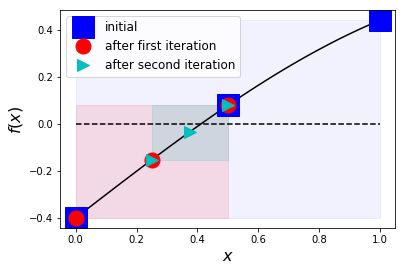

In [20]:
bisection_root()

### Newton's Method

Often, a better way to find roots of $f(x) = 0$ is [Newton's method](http://mathworld.wolfram.com/NewtonsMethod.html).

Like bisection,  Newton's method produces a sequence of approximations.

Unlike bisection, require an *initial guess* $x_0$ for the root $x_r$ (and it should be "close").

Quick motivation for Newton *from the math* by recalling

$$
\begin{split}
  f(x_{\text{true root}}) &= f(x_0+\Delta) \\
       &= f(x_0) + \Delta f'(x_0) + \mathcal{O}(\Delta^2) = 0 \, .
\end{split}
$$

Take a leap of faith: **ignore the** $\mathcal{O}(\Delta^2)$ **term** and set 

$$
  x_{\text{true root}} \approx x_1 = x_0 + \Delta = x_0 \overbrace{- f(x_0)/f'(x_0)}^{\Delta} \, ,
$$

and do this for $x_2$ in terms of $x_1$, $x_3$ in terms of $x_2$, etc. until $f(x_i)$ is "small enough".

```
'''Newton's method for finding the root f given x_0'''
Input: f, fp, x_0, tau
Set x = x_0
While |f(x)| > tau do
   # Compute the Newton "step" 
   Set Delta = -f(x)/fp(x)
   # Compute the next value of x
   Set x = x + Delta
Output: x
```

Quick motivation of Newton *from the geometry*...

**Exercise**: Solve $f(x) = \sin(x)-2/5 = 0$ starting with $x_0 = 0.5$ until $|f(x)| < 10^{-5}$.

If you don't have $f'(x)$, use a finite-difference approximation.

## Solving Systems of Nonlinear Equations Numerically

From $f(x) = 0$ to $\mathbf{f}(\mathbf{x}) = \mathbf{0}$...


...and from $f'(x)$ to the **Jacobian** matrix $\mathbf{J}$:

$$
  \mathbf{J}(\mathbf{x}) = \begin{bmatrix}
    \frac{\partial f_0}{\partial x_0} & \frac{\partial f_0}{\partial x_1} & \ldots & \frac{\partial f_{0}}{\partial x_{n-1}} \\
    \frac{\partial f_1}{\partial x_0} & \frac{\partial f_1}{\partial x_0} & \ldots & \frac{\partial f_{1}}{\partial x_{n-1}} \\
         &     &  \ddots &  \\
    \frac{\partial f_0}{\partial x_{n-1}} & \frac{\partial f_1}{\partial x_{n-1}} & \ldots & \frac{\partial f_{n-1}}{\partial x_{n-1}} 
\end{bmatrix}
$$

(here, partial derivatives evaluated at $\mathbf{x}$)

Newton's method leads to the sequence

$$ 
  \mathbf{x}_{n+1} = \mathbf{x}_{n} - \mathbf{J}^{-1}(\mathbf{x}_n) \mathbf{f}(\mathbf{x}_n) \, .
$$

But that's like solving $\overbrace{\mathbf{J}(\mathbf{x}_{n})}^{\mathbf{A}} \times \overbrace{[\mathbf{x}_{n} - \mathbf{x}_{n+1}]}^{\mathbf{x}} = \overbrace{\mathbf{f}(\mathbf{x}_n)}^{\mathbf{b}}$!

### `scipy.optimize.fsolve`

Good to know the equations, but better (usually) to use SciPy and its `scipy.optimize.fsolve` function:

The signature (from `help(fsolve)`) is
```python
fsolve(func, x0, args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)
```

Here, `func` represents the nonlinear system function $\mathbf{f}(\mathbf{x})$, and `args` represents any values needed to define what $\mathbf{f}(\mathbf{x})$ does.  The initial guess is `x0`.  If available, `fprime` should compute $\mathbf{J}(\mathbf{x})$; if not provided, `fsolve` approximates the Jacobian using a forward-difference approximation.

**Exercise** Suppose a bridge trunnion (a pin) has a diameter of 12.363 in but must fit into a slightly under-sized hole of diameter 12.358 in.  One option is to cool it. The coefficient of expansion for the trunnion material  (steel) is well approximated by

$$
 \alpha = -1.2 \cdot 10^{-11} T^2 + 6.2 \cdot 10^{-9} T + 6.0 \cdot 10^{-6}
$$

The change in the diameter if the trunnion is cooled to a temperature $T_c$ (from the sweltering 80 F) outside is

$$
\Delta D = D_{80} \int^{T_c}_{80} \alpha(T)dT \, .
$$

Find what $T_c$ must be.  Could it be ice water? What else?


**Exercise**  Solve the nonlinear system of equations 

$$
\begin{split}
x   - y &= 4 \\
   x^2 + y &= -3
\end{split}
$$

with initial guesses of $x=1/2$ and $y=-3$.

## Recap

By the end of this lesson, you should be able to

- Find one or more roots of a one-dimensional, nonlinear equation $f(x) = 0$ using the bisection and Newton methods.
- Find local extrema of a function $f(x)$ using the bisection and Newton methods.
- Use `fsolve` to solve nonlinear systems.